In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

# Charger le jeu de données CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Afficher la forme des données
print("Shape of training data:", x_train.shape)
print("Shape of test data:", x_test.shape)

Shape of training data: (50000, 32, 32, 3)
Shape of test data: (10000, 32, 32, 3)


In [4]:
# Statistiques descriptives
print("Number of training samples:", x_train.shape[0])
print("Number of test samples:", x_test.shape[0])
print("Image dimensions:", x_train.shape[1:])

Number of training samples: 50000
Number of test samples: 10000
Image dimensions: (32, 32, 3)


In [5]:
# Afficher quelques images
def plot_images(images, labels, num=10):
    plt.figure(figsize=(10, 2))
    for i in range(num):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f'Label: {labels[i][0]}')
        plt.axis('off')
    plt.show()

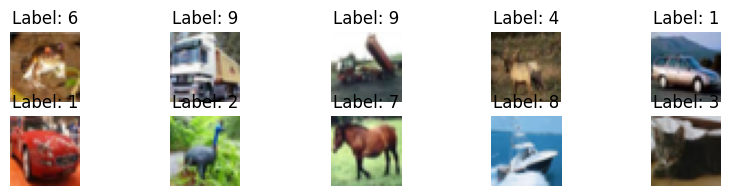

In [6]:
plot_images(x_train, y_train)

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le jeu de données Iris
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_data = pd.read_csv(url, header=None, names=column_names)

In [8]:
# Afficher les premières lignes du jeu de données
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
# Statistiques descriptives
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


c:\Users\djetek_user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\djetek_user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\djetek_user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\djetek_user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: 

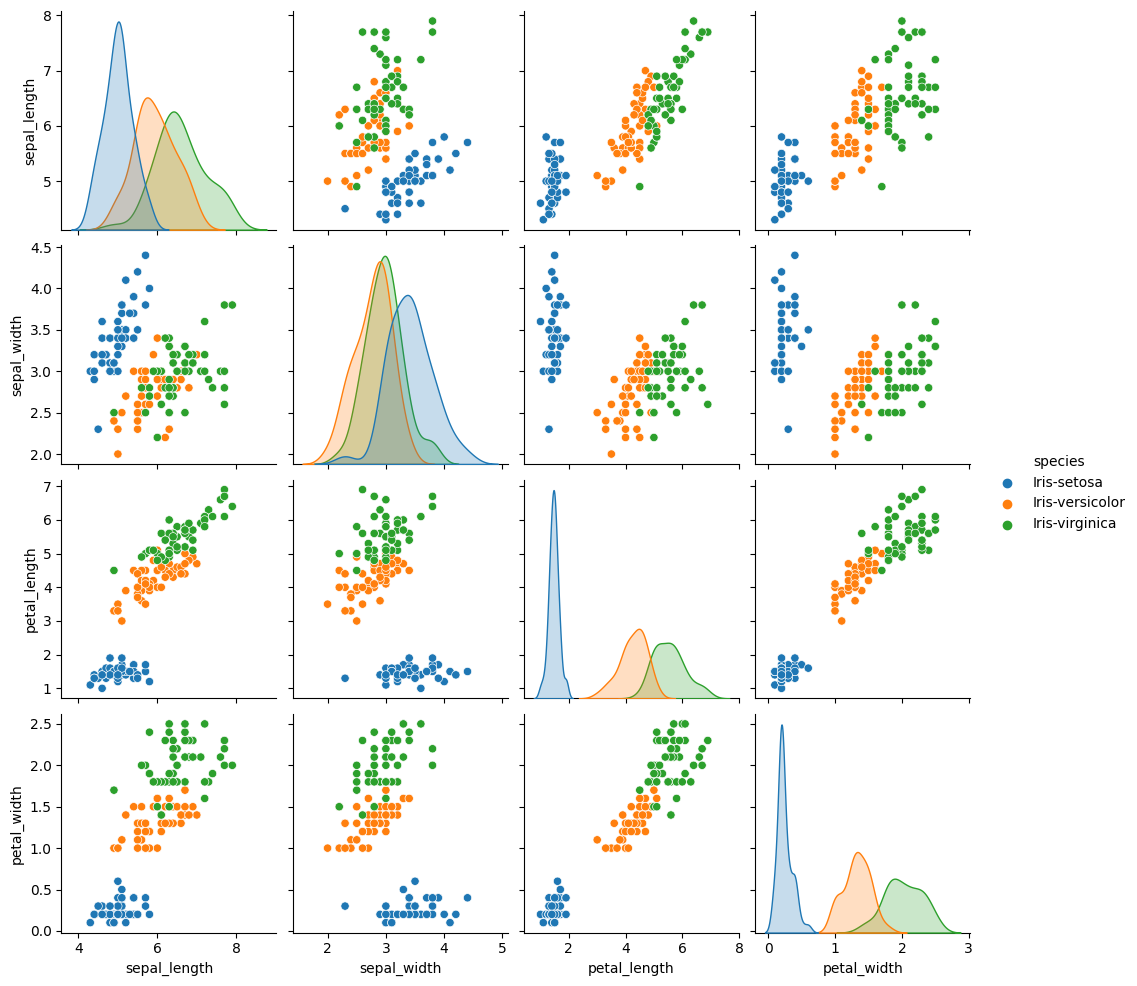

In [10]:

# Visualiser les distributions
sns.pairplot(iris_data, hue='species')
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

# Charger le jeu de données CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normaliser les données
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0



In [12]:
# Convertir les labels en one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Construire le modèle
def create_model(optimizer):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model



In [13]:
# Méthodes aléatoires et non aléatoires
random_optimizers = ['sgd', 'adam', 'rmsprop', 'adagrad', 'nadam']
#non_random_optimizers = ['gradient_descent', 'newton_method', 'bfgs', 'ridge_regression']

In [14]:
# Essayer les méthodes aléatoires
results_random = {}
for optimizer in random_optimizers:
    model = create_model(optimizer)
    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), verbose=0)
    results_random[optimizer] = history.history

c:\Users\djetek_user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [16]:
# Charger les données CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normaliser les images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir les étiquettes en one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Vérifier les formes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3), y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3), y_test shape: (10000, 10)


In [17]:
from tensorflow.keras import layers, models

def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [19]:
# Entraîner le modèle
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.7364 - loss: 0.7636 - val_accuracy: 0.6434 - val_loss: 1.0448
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.7435 - loss: 0.7306 - val_accuracy: 0.6425 - val_loss: 1.0760
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.7543 - loss: 0.7065 - val_accuracy: 0.6403 - val_loss: 1.0831
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.7629 - loss: 0.6886 - val_accuracy: 0.6267 - val_loss: 1.1364
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7686 - loss: 0.6636 - val_accuracy: 0.6355 - val_loss: 1.1071
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - accuracy: 0.7853 - loss: 0.6265 - val_accuracy: 0.6411 - val_loss: 1.1211
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.7986 - loss: 0.5941 - val_accuracy: 0.6449 - val_loss: 1.1226
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.7960 - loss: 0.5971 - 

In [20]:
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss}, Type: {type(loss)}")  # Cela devrait renvoyer un scalaire

Loss: [1.207092523574829, 0.6373000144958496], Type: <class 'list'>


In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from scipy.optimize import minimize

In [22]:
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [23]:
def load_and_prepare_data():
    # Charger les données CIFAR-10
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()
    
    # Normaliser les images
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # Convertir les étiquettes en one-hot encoding
    y_train = to_categorical(y_train, num_classes=10)
    y_test = to_categorical(y_test, num_classes=10)
    
    return (X_train, y_train), (X_test, y_test)

Implementation de la methode des Gradiants

In [24]:
def compute_gradient(model, X, y):
    with tf.GradientTape() as tape:
        predictions = model(X)
        loss = tf.keras.losses.categorical_crossentropy(y, predictions)
    return tape.gradient(loss, model.trainable_variables)


MATRICE HESSIENNE

In [25]:
def compute_hessian(model, X, y):
    hessian = []
    gradients = compute_gradient(model, X, y)
    
    for i, grad in enumerate(gradients):
        hessian_row = []
        for j in range(len(grad)):
            perturbation = 1e-5
            # Perturbation pour le calcul de la Hessienne
            model.set_weights([w + (perturbation if index == j else 0) for index, w in enumerate(model.get_weights())])
            loss_plus = model.evaluate(X, y, verbose=0)
            model.set_weights([w - (perturbation if index == j else 0) for index, w in enumerate(model.get_weights())])
            loss_minus = model.evaluate(X, y, verbose=0)
            model.set_weights([w + (perturbation if index == j else 0) for index, w in enumerate(model.get_weights())])  # Restaurer les poids
            hessian_row.append((loss_plus - 2 * loss + loss_minus) / (perturbation ** 2))
        hessian.append(hessian_row)
    
    return np.array(hessian)

ENTRAINNEMENT DU MODELE

In [26]:
def train_with_newton(X_train, y_train, X_test, y_test):
    model = create_model()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Boucle d'entraînement
    for epoch in range(10):  # Ajustez le nombre d'époques selon vos besoins
        print(f'Epoch {epoch + 1}')
        
        # Calculer le gradient
        gradient = compute_gradient(model, X_train, y_train)
        
        # Calculer la Hessienne
        hessian = compute_hessian(model, X_train, y_train)
        
        # Mettre à jour les poids
        for i in range(len(gradient)):
            hessian_inv = np.linalg.inv(hessian[i])  # Inverser la Hessienne
            model.trainable_variables[i].assign_sub(tf.convert_to_tensor(hessian_inv @ gradient[i].numpy()))

    # Évaluer le modèle
    train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Afficher les résultats
    print(f'Train Loss: {train_loss}, Train Accuracy: {train_accuracy}')
    print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

    # Calculer l'erreur de généralisation
    generalization_error = train_accuracy - test_accuracy
    print(f'Generalization Error: {generalization_error}')

Erreur de generalisation

In [27]:

# Évaluer le modèle sur l'ensemble d'entraînement
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
# Évaluer le modèle sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

In [28]:
# Calculer l'erreur de généralisation
generalization_error_loss = test_loss - train_loss
generalization_error_accuracy = train_accuracy - test_accuracy

print(f'Train Loss: {train_loss}, Train Accuracy: {train_accuracy}')
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
print(f'Generalization Error (Loss): {generalization_error_loss}')
print(f'Generalization Error (Accuracy): {generalization_error_accuracy}')

Train Loss: 0.5002665519714355, Train Accuracy: 0.8287000060081482
Test Loss: 1.207092523574829, Test Accuracy: 0.6373000144958496
Generalization Error (Loss): 0.7068259716033936
Generalization Error (Accuracy): 0.19139999151229858


In [29]:
def bfgs_loss_function(params):
    # Convertir les paramètres en un modèle et calculer la perte
    model = create_model()
    model.set_weights(params)  # Mettre à jour les poids
    loss = model.evaluate(X_train, y_train, verbose=0)
    return loss[0]  # Retourner la perte

In [30]:
def train_with_gd(X_train, y_train, X_test, y_test):
    model = create_model()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10, verbose=0)  # Ajustez le nombre d'époques

    return model

In [31]:
def evaluate_models(X_train, y_train, X_test, y_test):
    models = {}

    # Entraîner avec Gradient Descent
    models['GD'] = train_with_gd(X_train, y_train, X_test, y_test)

    # Entraîner avec Newton (ou BFGS ou toute autre méthode que vous utilisez)
    models['Newton'] = train_with_newton(X_train, y_train, X_test, y_test)

    # Évaluer les modèles
    for model_name, model in models.items():
        train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
        test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

        print(f"{model_name} - Train Loss: {train_loss}, Train Accuracy: {train_accuracy}")
        print(f"{model_name} - Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

        # Calculer l'erreur de généralisation
        generalization_error_loss = test_loss - train_loss
        generalization_error_accuracy = train_accuracy - test_accuracy

        print(f"{model_name} - Generalization Error (Loss): {generalization_error_loss}")
        print(f"{model_name} - Generalization Error (Accuracy): {generalization_error_accuracy}")

In [32]:
evaluate_models(X_train, y_train, X_test, y_test)

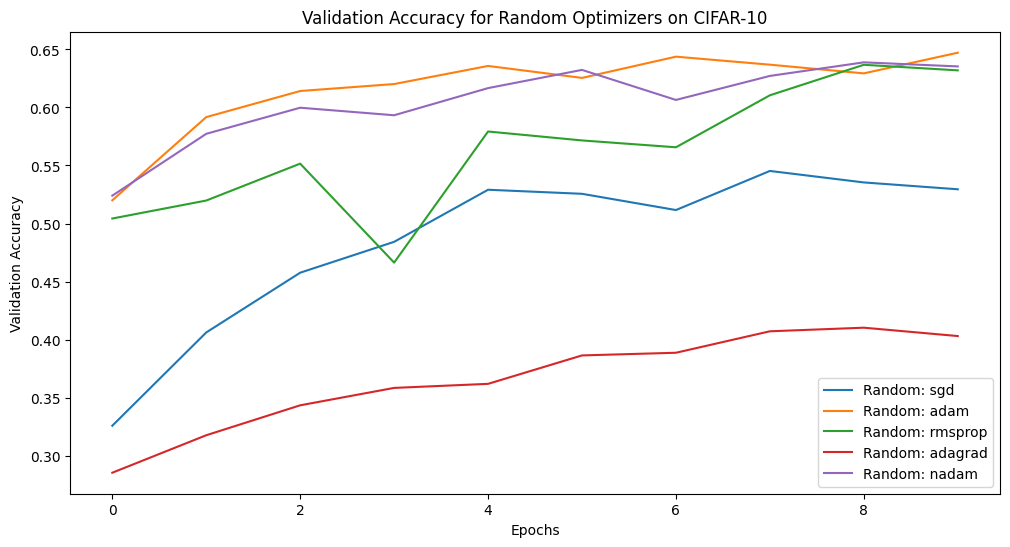

In [168]:
# Visualiser les résultats des méthodes aléatoires
plt.figure(figsize=(12, 6))
for optimizer in random_optimizers:
    plt.plot(results_random[optimizer]['val_accuracy'], label=f'Random: {optimizer}')
plt.title('Validation Accuracy for Random Optimizers on CIFAR-10')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


In [169]:
# Visualiser les résultats des méthodes non aléatoires
plt.figure(figsize=(12, 6))
for optimizer in non_random_optimizers:
    plt.plot(results_non_random[optimizer]['val_accuracy'], label=f'Non-Random: {optimizer}')
plt.title('Validation Accuracy for Non-Random Optimizers on CIFAR-10')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

KeyError: 'gradient_descent'

<Figure size 1200x600 with 0 Axes>